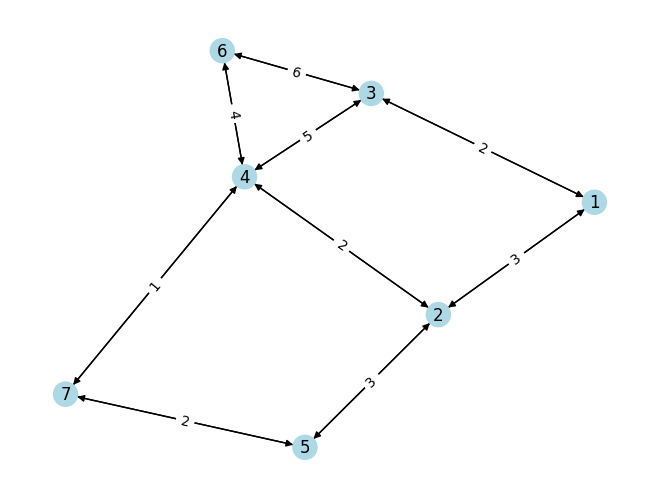

In [21]:
%run ./base.ipynb

In [22]:
# Dijkstra's algorithm
def dijkstra(graph: nx.Graph, start = None):
    Q = []

    # Leere dicts, um den Vorgänger-Knoten und die Distanz zu behalten
    dist = dict()
    prev = dict()

    # Setze die Distanz zu allen Knoten mit unendlich
    for node in list(graph.nodes()):
        dist[node] = float('inf')
        prev[node] = None
        Q.append(node)

    # TODO variable start
    start = start if (start is not None) else Q[0]
    dist[start] = 0

    # Solang Knoten in Q
    while len(Q) > 0:
        # Verarbeite den nächsten Knoten aus Q
        u = Q.pop(0)

        edges = graph.out_edges(u, data=True)

        # Prüfe für alle Kanten von u
        for (_, v, data) in edges:
            # Ob die aktuelle Distanz von u plus das Gewicht der Kante
            alt = dist[u] + data['weight']

            # Kleiner ist, als die aktuelle Distanz zu v
            if alt < dist[v]:
                # wenn ja, aktualisiere den Vorgänger und die Distanz zu v
                dist[v] = alt
                prev[v] = u

    return (dist, prev, start)

dist, prev, start = dijkstra(G)

print(dist, prev)

{1: 0, 2: 3, 3: 2, 4: 5, 5: 6, 6: 8, 7: 6} {1: None, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 4}


In [23]:
# Construct path from start to end
def get_path_to(prev, end):
    path = []
    u = end
    while u is not None:
        path.insert(0, u)
        u = prev[u]
    return path

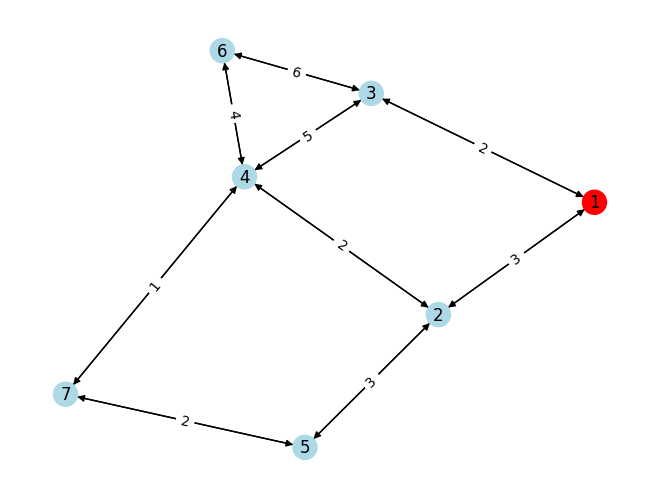

[1, 2, 4, 7]


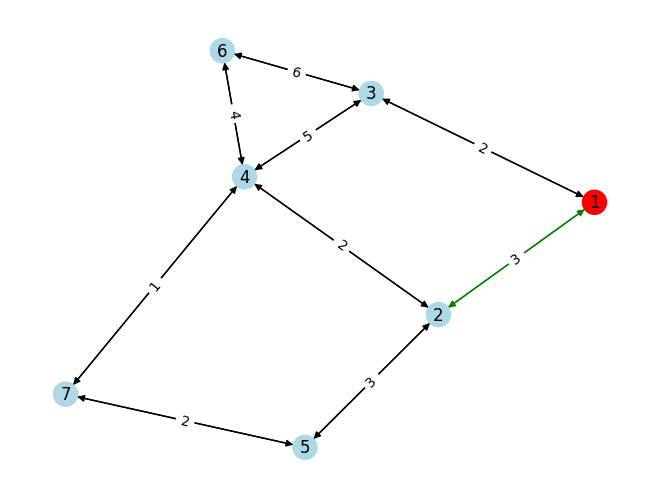

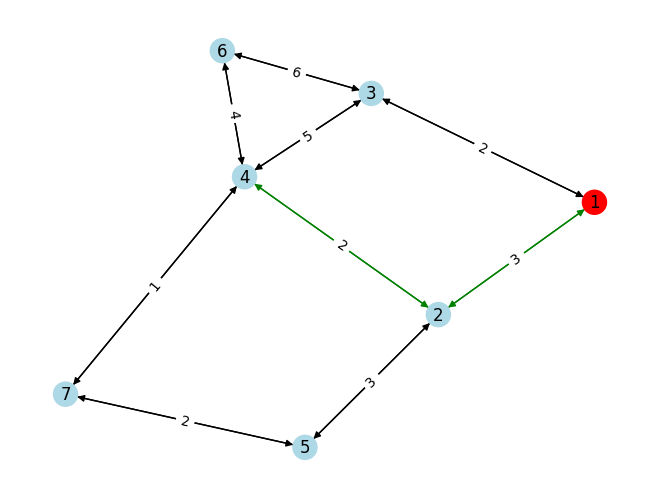

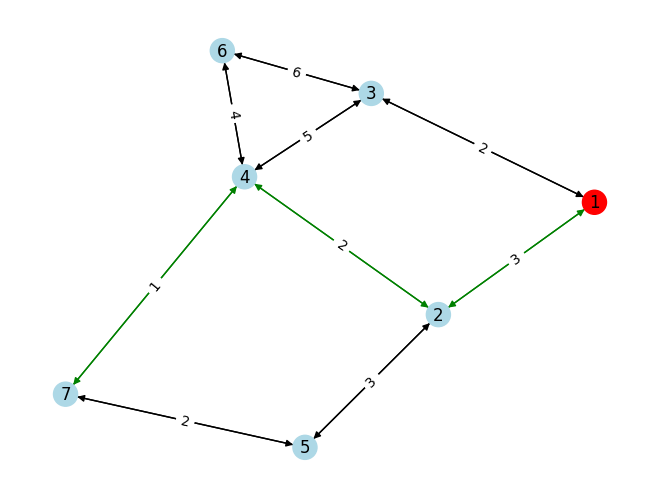

In [ ]:
# Visualisierung
visualizer.color_node(start, color="red")

# Visalisiere den kürzesten Weg von start zu Knoten 7
path = get_path_to(prev, 7)

print(path)

for i in range(len(path) - 1):
    visualizer.color_edge((path[i], path[i + 1]), color="green")
